In [1]:
import glob
import pandas as pd
import numpy as np

In [2]:
fnames = sorted(glob.glob('./jtwc_data/*'))

In [3]:
df = pd.DataFrame(columns = ['BASIN' , 'CY' , 'YYYYMMDDHH' , 'TECHNUM' , 'TECH' , 'TAU' , 'LatN/S' , 'LonE/W' , 'VMAX' , 'MSLP' ,
'TY' , 'RAD' , 'WINDCODE' , 'RAD1' , 'RAD2' , 'RAD3' , 'RAD4' , 'RADP' , 'RRP' , 'MRD' , 'GUSTS' , 'EYE' ,
'SUBREGION' , 'MAXSEAS' , 'INITIALS' , 'DIR' , 'SPEED' , 'STORMNAME' , 'DEPTH' , 'SEAS' ,
'SEASCODE' , 'SEAS1' , 'SEAS2' , 'SEAS3' , 'SEAS4'])

In [4]:
for f in fnames:
    with open(f) as file:
        lines = [line.rstrip() for line in file]
    for x in lines:
        lst = x.split(', ')[0:35]
        new_row =  lst + [np.nan] * (35 - len(lst))
        df.loc[len(df)] = new_row

In [5]:
df['YYYYMMDDHH'] = pd.to_datetime(df['YYYYMMDDHH'], format = '%Y%m%d%H')
df.set_index('YYYYMMDDHH', inplace = True)
df.sort_index(inplace = True)

In [8]:
##  SELECTING ONLY ARABIAN SEA AND ONLY SOME OF THE AVAILABLE COLUMNS
df_select_columns = df[df['SUBREGION'] == '  A'][['CY', 'LatN/S', 'LonE/W', 'VMAX', 'MSLP', 'TY']]

## TY - Level of tc development: <br>
TD - tropical depression,<br>
TS - tropical storm,<br>
TY - typhoon,<br>
ST - super typhoon,<br>
TC - tropical cyclone,<br>
HU - hurricane,<br>
SD - subtropical depression,<br>
SS - subtropical storm,<br>
EX - extratropical systems,<br>
MD - monsoon depression,<br>
IN - inland,<br>
DS - dissipating,<br>
LO - low,<br>
WV - tropical wave,<br>
ET - extrapolated,<br>
XX - unknown.<br>

![Screenshot 2024-08-22 at 15.23.11.png](<attachment:Screenshot 2024-08-22 at 15.23.11.png>)



https://www.ncei.noaa.gov/sites/g/files/anmtlf171/files/2024-07/IBTrACS_version4r01_Technical_Details.pdf

https://www.ncei.noaa.gov/sites/g/files/anmtlf171/files/2024-06/IBTrACS%20v04r01%20column%20documentation.pdf
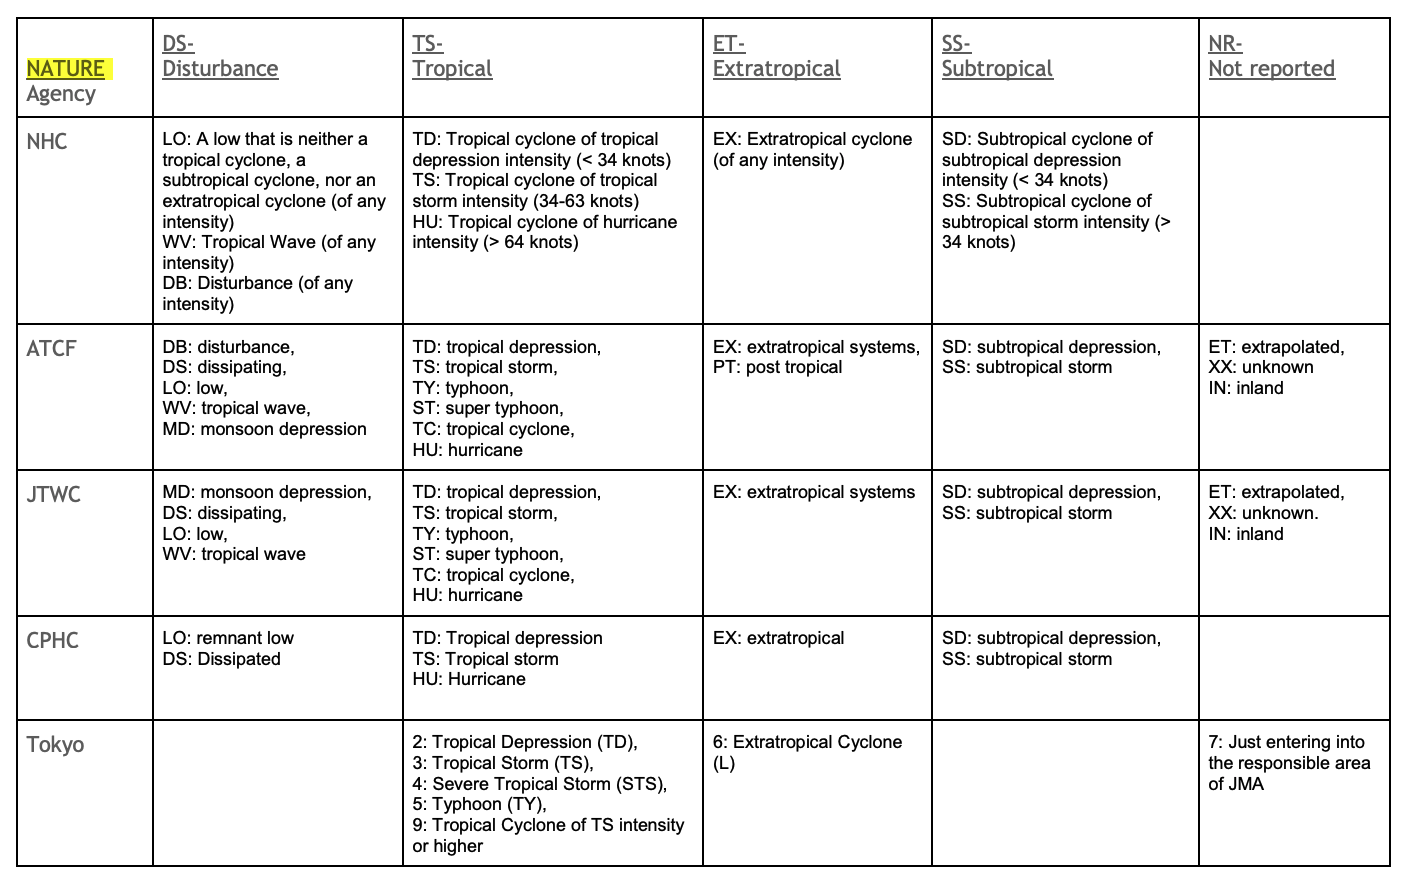

In [16]:
df_select_columns['CY_Serial'] = df_select_columns.index.year*100 + df_select_columns['CY'].astype('int')
df_select_columns = df_select_columns.drop('CY', axis = 1)

In [17]:
filtered_df = df_select_columns[df_select_columns['TY'].isin(['TD', 'TS', 'TY', 'ST', 'TC', 'HU'])]

In [ ]:
df_select_columns.to_csv('CYCLONE_BEST_TRACK_FROM_JTWC.csv')

In [24]:
len(filtered_df['CY_Serial'].unique())

36

In [25]:
filtered_df.to_csv('CYCLONE_BEST_TRACK_AS_FROM_JTWC.csv')